In [ ]:
import pandas as pd

#Sección Uno. Repaso clase con Toni
Vamos a realizar unos ejercicios para repasar toda la capa de dataframes, locs, ilocs, etc.

In [ ]:
#1. Vamos a crear un dataframe para recordar como se crean (tabla como si fueran filas y columnas)
#.  El dataframe va a estar formado por tres columnas llamadas:
# - Nombres_Nuevos - Valores: Guille, Carlos, Jose
# - Edad - Valores: 50, 31, 18
# - Master - Valores: MDS, MDBS, EMBA
clase_dos = pd.DataFrame({"Nombres_Nuevos": ["Guille", "Carlos", "Jose"], "Edad":[50,31,18],"Master":["MDS","MBDS","EMBA"]})
clase_dos

,Nombres_Nuevos,Edad,Master
0,Guille,50,MDS
1,Carlos,31,MBDS
2,Jose,18,EMBA


In [ ]:
#2. Vamos ahora a ver solo una columna, en este caso la de Edad
clase_dos.Edad

0    50
1    31
2    18
Name: Edad, dtype: int64

In [ ]:
#3. Ahora vamos a ver el nombre de nuestras columnas
clase_dos.columns

Index(['Nombres_Nuevos', 'Edad', 'Master'], dtype='object')

In [ ]:
#4. Tambien vamos a ver el índice de nuestro DF.
clase_dos.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
#5.1. Ahora vamos a intentar encontrar el valor Guille con iloc.
#.    Con iloc vamos a buscar los ficheros 
clase_dos.iloc[0,0]

'Guille'

In [ ]:
#5.2. Ahora vamos a intentar encontrar el valor Guille con loc.
clase_dos.loc[0,:].values[0]

'Guille'

In [ ]:
#5.3. Tambien tenemos otra manera de hacerlo con loc
clase_dos.loc[0,"Master"]

'MDS'

In [ ]:
#6.1. Vamos a recordar como cambiar el índice de una de nuestras columnas, vamos a poner Edad como indice
clase_dos=clase_dos.set_index('Master')

In [ ]:
#6.2. Ahora vamos a volver a buscar en dicha tabla con loc para ver como cambia el index y las diferencias con el caso anterior.
clase_dos.loc["EMBA","Edad"]

18

In [ ]:
clase_dos = pd.DataFrame({"Nombres_Nuevos": ["Guille", "Carlos", "Jose"], "Edad":[50,31,18],"Master":["MDS","MBDS","EMBA"]})
#7. Otra manera de encontrar valores, podemos buscar la solo el master EMBA para ver que ocurre
clase_dos["Master"]=="EMBA"
#.  Esto nos devolvía valores true/false en función de lo que encuentra

0    False
1    False
2     True
Name: Master, dtype: bool

In [ ]:
#8. Ahora vamos a buscar en ciertas columna lo que hemos hecho antes, primero vamos a sacar la columna de Nombres_nuevos
clase_dos.Nombres_Nuevos

0    Guille
1    Carlos
2      Jose
Name: Nombres_Nuevos, dtype: object

In [ ]:
#9. Pero una vez tenemos dicha columna, queremos saber cual es el nombre cuyo master es el EMBA
#.  Para eso, simplemente tenemos que buscar por dicha condición
clase_dos.Nombres_Nuevos[clase_dos["Master"]=="EMBA"]

2    Jose
Name: Nombres_Nuevos, dtype: object

In [ ]:
#10. Tambien podemos mezclar varias condiciones
#.   Por ejemplo, vamos a mezclar que el valor del master sea EMBA o MBDS
clase_dos.Nombres_Nuevos[(clase_dos["Master"]=="EMBA") | (clase_dos["Master"]=="MBDS")]

1    Carlos
2      Jose
Name: Nombres_Nuevos, dtype: object

In [ ]:
#11. Si en vez de usar una columna, solo usamos el DF nos devuelve todas las filas.
clase_dos[(clase_dos["Master"]=="EMBA") | (clase_dos["Master"]=="MBDS")]

,Nombres_Nuevos,Edad,Master
1,Carlos,31,MBDS
2,Jose,18,EMBA


In [ ]:
#12. Vamos a recordar ahora como asignar un valor a una celda
#.   Para ello vamos a usar iloc para cambiar un valor específico
#.   En este caso vamos a cambiar el valor de Jose por Maria
clase_dos.iloc[2,0]="Maria"
clase_dos

,Nombres_Nuevos,Edad,Master
0,Guille,50,MDS
1,Carlos,31,MBDS
2,Maria,18,EMBA


In [ ]:
#13. Ahora vamos a cambiar el valor de la Edad de Marúa a 45 con loc
clase_dos.loc[2,"Edad"]=45
clase_dos

,Nombres_Nuevos,Edad,Master
0,Guille,50,MDS
1,Carlos,31,MBDS
2,Maria,45,EMBA


In [ ]:
#14. Tambien podemos incluirle condicionales a la hora de asignar valores.
#.   Para ello incluimos el condicional en la forma en que busquemos (iloc, loc, values, etc)
clase_dos.loc[clase_dos.Edad>35,"Master"]="MMMA"
clase_dos

,Nombres_Nuevos,Edad,Master
0,Guille,50,MMMA
1,Carlos,31,MBDS
2,Maria,45,MMMA


#Seccion Dos. Renombrar, combinar y juntar DataFrames

En esta sección aprenderemos a alterar los nombres de las columnas de nuestro dataset y a combinar datasets , y juntar dos DataFrames en uno, de forma parecida a como lo hacíamos con SQL.


In [ ]:
import pandas as pd

orders = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/customers.csv")
orders

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
0,JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
1,SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
2,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
3,ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
4,JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South
...,...,...,...,...,...,...,...,...
788,CS-12460,Chuck Sachs,Consumer,United States,New York City,New York,10009,East
789,JM-15250,Janet Martin,Consumer,United States,Baltimore,Maryland,21215,East
790,MC-18100,Mick Crebagga,Consumer,United States,Chicago,Illinois,60623,Central
791,VP-21760,Victoria Pisteka,Corporate,United States,San Francisco,California,94109,West


In [ ]:
#1. Vamos a ver las columnas de nuestro DF
orders.columns

Index(['Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region'],
      dtype='object')

In [ ]:
#2. Vemos las columnas y filas que tenemos con el shape 
orders.shape

(793, 8)

In [ ]:
#3. Por ultimo vamos a ver los tipos de datos que tenemos
orders.dtypes

Customer_ID      object
Customer_Name    object
Segment          object
Country          object
City             object
State            object
Postal_Code       int64
Region           object
dtype: object

## Renombrar
Para renombrar columnas utilizaremos la función rename().

In [ ]:
#1. Por ejemplo, si queremos renombrar la columna Order_Date lo haremos de la siguiente forma.
orders.rename(columns={"Order_Date": "Date"})
orders.head()

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
0,JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
1,SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
2,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
3,ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
4,JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South


In [ ]:
#2. En el código anterior se muestra el DataFrame con la columna todavía llamándose Order_Date... 
#   Esto es así porque no le asignamos a orders el valor del dataframe con el nombre nuevo...
orders = orders.rename(columns={"Order_Date": "Date"})
orders.head()

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
0,JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
1,SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
2,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
3,ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
4,JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South


In [ ]:
#3. Esto ocurre muchas veces en Python en general y con Pandas en particular. 
#.  En Pandas, existe una forma de hacerlo cómodamente con el comando inplace.
#.  Vamos a cambiar de nuevo el nombre de la columna y ponerle el nombre que tenia anteriormente. 
#.  Al añadir el argumento inplace=True, no necesitamos asignarle a orders el valor de orders.rename().
orders.rename(columns={"Date": "Order_Date"}, inplace=True)
orders.head()

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
0,JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
1,SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
2,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
3,ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
4,JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South


In [ ]:
#4. Otra cosa que podemos renombrar son los ejes. No es crítico pero si estamos haciendo un notebook de python muy didáctico o divulgativo es útil.
orders.rename_axis("Orders", axis='rows').rename_axis("Details", axis='columns')  
#encadenar la salida de una funcion con otra también es algo muy típico

Details,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
Orders,,,,,,,,
0,JL-15130,Jack Lebron,Consumer,United States,Riverside,California,92503,West
1,SW-20245,Scot Wooten,Consumer,United States,Springfield,Ohio,45503,East
2,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South
3,ML-18040,Michelle Lonsdale,Corporate,United States,Missouri City,Texas,77489,Central
4,JG-15115,Jack Garza,Consumer,United States,Charlotte,North Carolina,28205,South
...,...,...,...,...,...,...,...,...
788,CS-12460,Chuck Sachs,Consumer,United States,New York City,New York,10009,East
789,JM-15250,Janet Martin,Consumer,United States,Baltimore,Maryland,21215,East
790,MC-18100,Mick Crebagga,Consumer,United States,Chicago,Illinois,60623,Central


## Combinar DataFrames

En ocasiones tenemos diferentes archivos o DataFrames que contienen información con los mismos campos o columnas. Imaginemos que tenemos archivos de años diferentes y queremos agruparlos en uno para trabajar con todos los años en el mismo DataFrame.


*   [Concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)



In [ ]:
#1. Utilizaremos la funcion concat()

dataframe1 = orders[0:1000]
dataframe2 = orders[1000:2000]

dataframe3 = pd.concat([dataframe1, dataframe2]) #mirad que a la funcion concat le pasamos un array de dataframes. Pueden ser más de 2!!
dataframe3

,Customer_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Product_ID,Quantity
0,MG-17875,CA-2014-103744,2014-02-23,2014-02-27,Standard Class,OFF-LA-10004425,3
1,MG-17875,CA-2014-103744,2014-02-23,2014-02-27,Standard Class,OFF-BI-10000320,3
2,DE-13255,CA-2014-109134,2014-11-05,2014-11-10,Standard Class,FUR-FU-10000320,6
3,MD-17350,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,FUR-FU-10001468,2
4,MD-17350,CA-2014-114251,2014-11-05,2014-11-10,Standard Class,OFF-BI-10003684,2
...,...,...,...,...,...,...,...
1995,MM-17920,CA-2017-164329,2017-01-30,2017-01-30,Same Day,OFF-ST-10001511,2
1996,DC-13285,CA-2017-104003,2017-10-07,2017-10-13,Standard Class,FUR-BO-10003965,2
1997,JK-15370,US-2014-102715,2014-04-11,2014-04-13,Second Class,TEC-AC-10001874,7
1998,JK-15370,US-2014-102715,2014-04-11,2014-04-13,Second Class,OFF-PA-10000029,2


## Juntar Dataframes

Vamos a ver los [tipos de JOIN que existen.](http://www.sql-join.com/sql-join-types)

Igual que en SQL, con pandas podemos juntar tablas diferentes que tienen un campo común de manera muy fácil con la funcion  [merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge) y  [join()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)




In [ ]:
#1. Vamos a juntar ahora dos ficheros nuevos llamados orders y products, para ello vamos a hacer un left join por el campo product_id
orders = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/orders.csv")
products = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/products.csv")

orders_and_products = orders.merge(products, how="left", on="Product_ID")
orders_and_products.head()

,Product_ID,Category_x,Sub_Category_x,Product_Name_x,Price_x,Category_y,Sub_Category_y,Product_Name_y,Price_y
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0


In [ ]:
#2. Al encontrar una columna (Product_Name) con el mismo nombre en los dos dataframes, Pandas nos añade el sufijo _x _y para diferenciarlos, pero podemos cambiarle este sufijo.
orders_and_products = orders.merge(products, how="left", on="Product_ID", suffixes=("_orders", "_products"))
orders_and_products.head()


,Product_ID,Category_orders,Sub_Category_orders,Product_Name_orders,Price_orders,Category_products,Sub_Category_products,Product_Name_products,Price_products
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0


In [ ]:
#3. Cuando la columna por la que queremos unir los dos dataframes no tiene el mismo nombre podemos...
#...especificar el nombre que tiene tanto en el dataframe de la izquierda como en el de la derecha, con left_on y right_on.

#cargamos de nuevo las tablas limpias
orders = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/orders.csv")
products = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/products.csv")

#renombramos la columna de Product_ID 
orders = orders.rename(columns={"Product_ID": "ID_Product"})

orders_and_products = orders.merge(products, how="left", left_on="ID_Product", right_on="Product_ID", suffixes=("_orders", "_products"))
orders_and_products.head()

,ID_Product,Category_orders,Sub_Category_orders,Product_Name_orders,Price_orders,Product_ID,Category_products,Sub_Category_products,Product_Name_products,Price_products
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0


In [ ]:
#4. La función join funciona de forma muy parecida, pero requiere que al menos el dataframe de la derecha tenga index asignado.
orders = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/orders.csv")
products = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/products.csv")


orders.join(products.set_index("Product_ID"), on="Product_ID", lsuffix="_o", rsuffix="_p")

,Product_ID,Category_o,Sub_Category_o,Product_Name_o,Price_o,Category_p,Sub_Category_p,Product_Name_p,Price_p
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",422.0
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank...",847.0
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0,Furniture,Bookcases,Sauder Inglewood Library Bookcases,828.0
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0,Furniture,Bookcases,"Hon Metal Bookcases, Gray",633.0
...,...,...,...,...,...,...,...,...,...
1889,OFF-EN-10001990,Office Supplies,Envelopes,Staple envelope,501.0,Office Supplies,Envelopes,Staple envelope,501.0
1890,OFF-EN-10002621,Office Supplies,Envelopes,Staple envelope,782.0,Office Supplies,Envelopes,Staple envelope,782.0
1891,OFF-EN-10003134,Office Supplies,Envelopes,Staple envelope,524.0,Office Supplies,Envelopes,Staple envelope,524.0
1892,OFF-EN-10003286,Office Supplies,Envelopes,Staple envelope,482.0,Office Supplies,Envelopes,Staple envelope,482.0


# Escribiendo ficheros

Escribir un fichero CSV es casi tan fácil como leerlo, utilizando la funcion to_csv() [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)


In [ ]:
products = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/products.csv")

products.to_csv("productos.csv")

# Ejercicio 1

Ve a [este Notebook](https://colab.research.google.com/drive/1jNx8W5zirKqBrKC_wQQvgZk6SHKzJlr3) y realiza el ejercicio de Renombrar :)

# Sección Tres. Crear funcionas, Apply y Map
Cuando qeuremos realizar un método específico podemos crear una función con el comando def.
Vamos a ver que es cada método
* [any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html): Utilizaremos la funcion apply cuando queremos aplicar una funcion a todos los elementos de nuestra DF.
* [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html): Utilizaremos la función map cuando queremos aplicar una funcion a todos los elementos de una columna. La función Map() toma como argumento otra función, que contiene el código que queremos aplicar a cada elemento de la lista o columna.

La diferencia entre ellos es que applymap es un función basada en elementos que trabaja en el dataframe, mientras map lo hace en las series, o sea una columna o una fila.

In [ ]:
#1. Vamos a crear un nuevo dataframe llamada prueba_map
#.  El dataframe va a estar formado por dos columnas llamadas:
# - Ingresos - Valores: 100,50,25
# - Num_Transferencias_Realizadas - Valores: 4,10,25
prueba_map = pd.DataFrame({"Ingresos":[100,50,25],"Num_Transferencias_Realizadas": [4,10,25]})
prueba_map

,Ingresos,Num_Transferencias_Realizadas
0,100,4
1,50,10
2,25,25


In [ ]:
#1. Ahora vamos a aplicar un map con una funcion de suma mismo
import numpy as np
prueba_map.Ingresos.map(sum(2))

TypeError: ignored

In [ ]:
#2. Por otro lado, vamos a crear una función nueva que la vamos a llamar sumar_cinco y le vamos a pasar un parámetro al cual se le va a sumar cinco
def sumar_cinco(x):
  return x+5


In [ ]:
#3. Ahora vamos a aplicar dicha función a una de nuestras columnas. La col ingresos
prueba_map.Ingresos.map(sumar_cinco)

0    105
1     55
2     30
Name: Ingresos, dtype: int64

In [ ]:
#4. ¿Que pasa si lo hacemos con apply en vez de que con Map?
prueba_map.apply(sumar_cinco)

,Ingresos,Num_Transferencias_Realizadas
0,105,9
1,55,15
2,30,30


In [ ]:
#5. Vamos a crear un nuevo dataframe, llamado prueba_error, que tenga una columna más con texto
prueba_error = pd.DataFrame({"Ingresos":[100,50,25],"Num_Transferencias_Realizadas": [4,10,25], "Cuenta_Bancaria":["XXQ","BAS","PKI"]})
prueba_error.dtypes

Ingresos                          int64
Num_Transferencias_Realizadas     int64
Cuenta_Bancaria                  object
dtype: object

In [ ]:
#6. Ahora vamos a aplicar el apply otra vez para ver que ocurre
prueba_error.apply(sumar_cinco)
#En este caso da error porque logicamente una de nuestra columnas es un string y no funciona, pero podemos arreglar esto en nuestra función

# DEJA TU FEEDBACK Y AYUDANOS A MEJORAR :) 

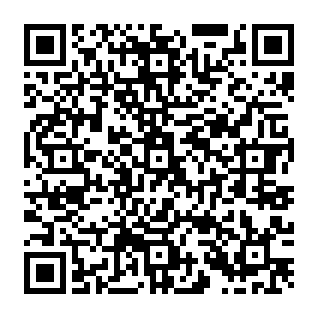
